Importing libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Loading Main Dataset

In [74]:
df = pd.read_csv(r"C:\Users\pc\Documents\MACHINE LEARNING\Codveda-Internship\Linear Regression Model\datasets\4) house Prediction Data Set.csv", sep=",", header=None)

if df.shape[1] == 1:
    df = df[0].astype(str).str.split(expand=True)
df.columns = ['crime_rate', 'residential_zone', 'industrial_area', 'near_river', 'air_pollution',
 'avg_rooms', 'old_houses', 'distance_to_jobs', 'highway_access', 'property_tax',
 'student_teacher_ratio', 'black_index', 'low_income_pct', 'house_price']
df.head()



,crime_rate,residential_zone,industrial_area,near_river,air_pollution,avg_rooms,old_houses,distance_to_jobs,highway_access,property_tax,student_teacher_ratio,black_index,low_income_pct,house_price
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   crime_rate             506 non-null    object
 1   residential_zone       506 non-null    object
 2   industrial_area        506 non-null    object
 3   near_river             506 non-null    object
 4   air_pollution          506 non-null    object
 5   avg_rooms              506 non-null    object
 6   old_houses             506 non-null    object
 7   distance_to_jobs       506 non-null    object
 8   highway_access         506 non-null    object
 9   property_tax           506 non-null    object
 10  student_teacher_ratio  506 non-null    object
 11  black_index            506 non-null    object
 12  low_income_pct         506 non-null    object
 13  house_price            506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [76]:
df = df.apply(pd.to_numeric, errors='coerce')

In [77]:
df.dtypes

crime_rate               float64
residential_zone         float64
industrial_area          float64
near_river                 int64
air_pollution            float64
avg_rooms                float64
old_houses               float64
distance_to_jobs         float64
highway_access             int64
property_tax             float64
student_teacher_ratio    float64
black_index              float64
low_income_pct           float64
house_price              float64
dtype: object

In [78]:
df.describe()

,crime_rate,residential_zone,industrial_area,near_river,air_pollution,avg_rooms,old_houses,distance_to_jobs,highway_access,property_tax,student_teacher_ratio,black_index,low_income_pct,house_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [79]:
df.columns

Index(['crime_rate', 'residential_zone', 'industrial_area', 'near_river',
       'air_pollution', 'avg_rooms', 'old_houses', 'distance_to_jobs',
       'highway_access', 'property_tax', 'student_teacher_ratio',
       'black_index', 'low_income_pct', 'house_price'],
      dtype='object')

In [80]:
df.isna().sum()

crime_rate               0
residential_zone         0
industrial_area          0
near_river               0
air_pollution            0
avg_rooms                0
old_houses               0
distance_to_jobs         0
highway_access           0
property_tax             0
student_teacher_ratio    0
black_index              0
low_income_pct           0
house_price              0
dtype: int64

In [81]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analysis

Numerical Variables Distribution

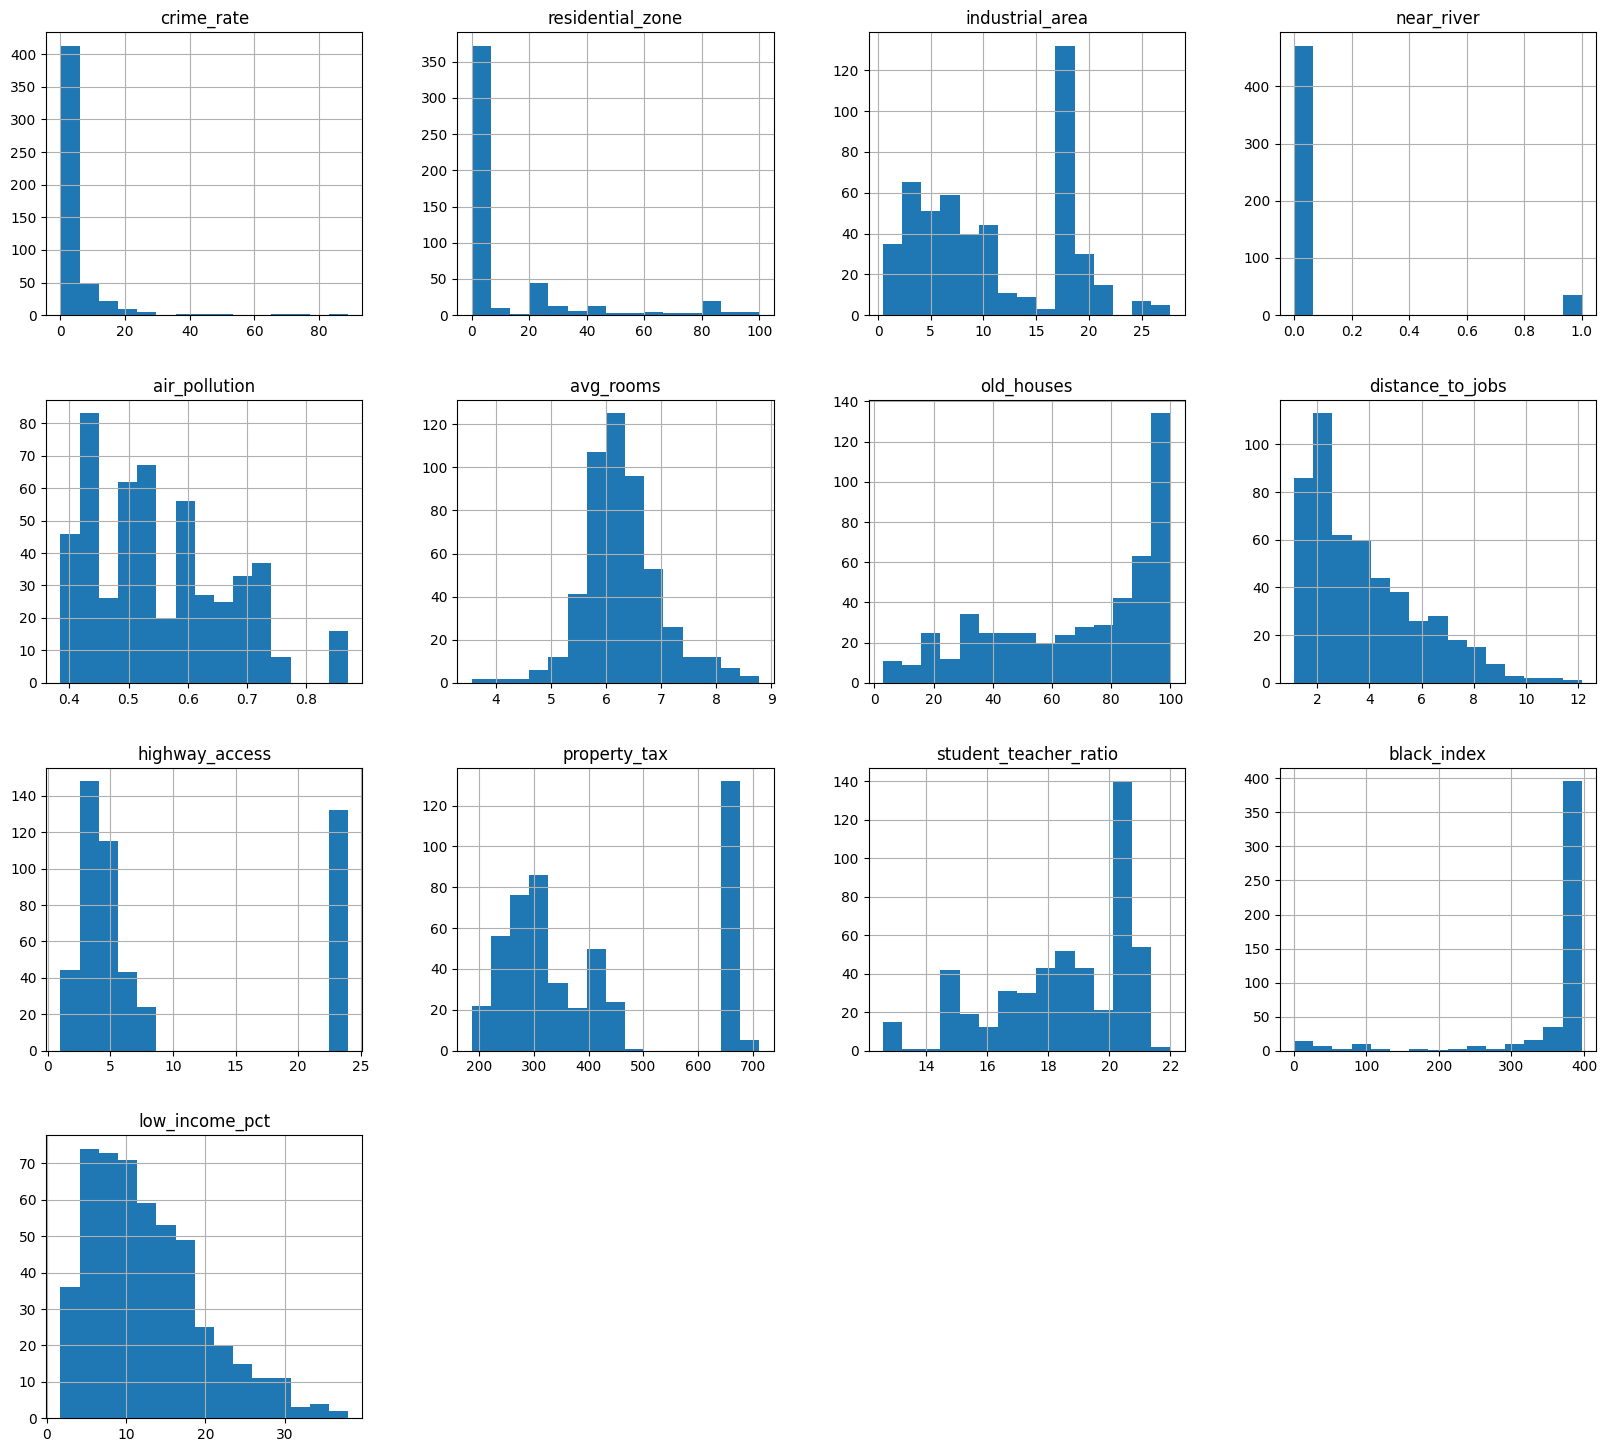

In [82]:
df_num = df._get_numeric_data().drop('house_price', axis=1)
df_num.hist(bins=15, figsize=(20,18))
plt.show()

Target Variable Distribution

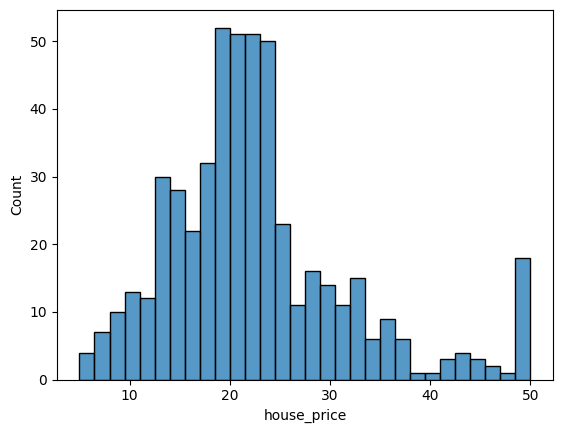

In [83]:
sns.histplot(df['house_price'], bins=30)
plt.show()

Feature Correlation

In [84]:
df_num = df._get_numeric_data()
df_corr = df.corr()['house_price'].drop('house_price')
df_corr

crime_rate              -0.388305
residential_zone         0.360445
industrial_area         -0.483725
near_river               0.175260
air_pollution           -0.427321
avg_rooms                0.695360
old_houses              -0.376955
distance_to_jobs         0.249929
highway_access          -0.381626
property_tax            -0.468536
student_teacher_ratio   -0.507787
black_index              0.333461
low_income_pct          -0.737663
Name: house_price, dtype: float64

In [85]:
df_num.corr()['house_price'].drop('house_price').abs().sort_values(ascending=False)


low_income_pct           0.737663
avg_rooms                0.695360
student_teacher_ratio    0.507787
industrial_area          0.483725
property_tax             0.468536
air_pollution            0.427321
crime_rate               0.388305
highway_access           0.381626
old_houses               0.376955
residential_zone         0.360445
black_index              0.333461
distance_to_jobs         0.249929
near_river               0.175260
Name: house_price, dtype: float64

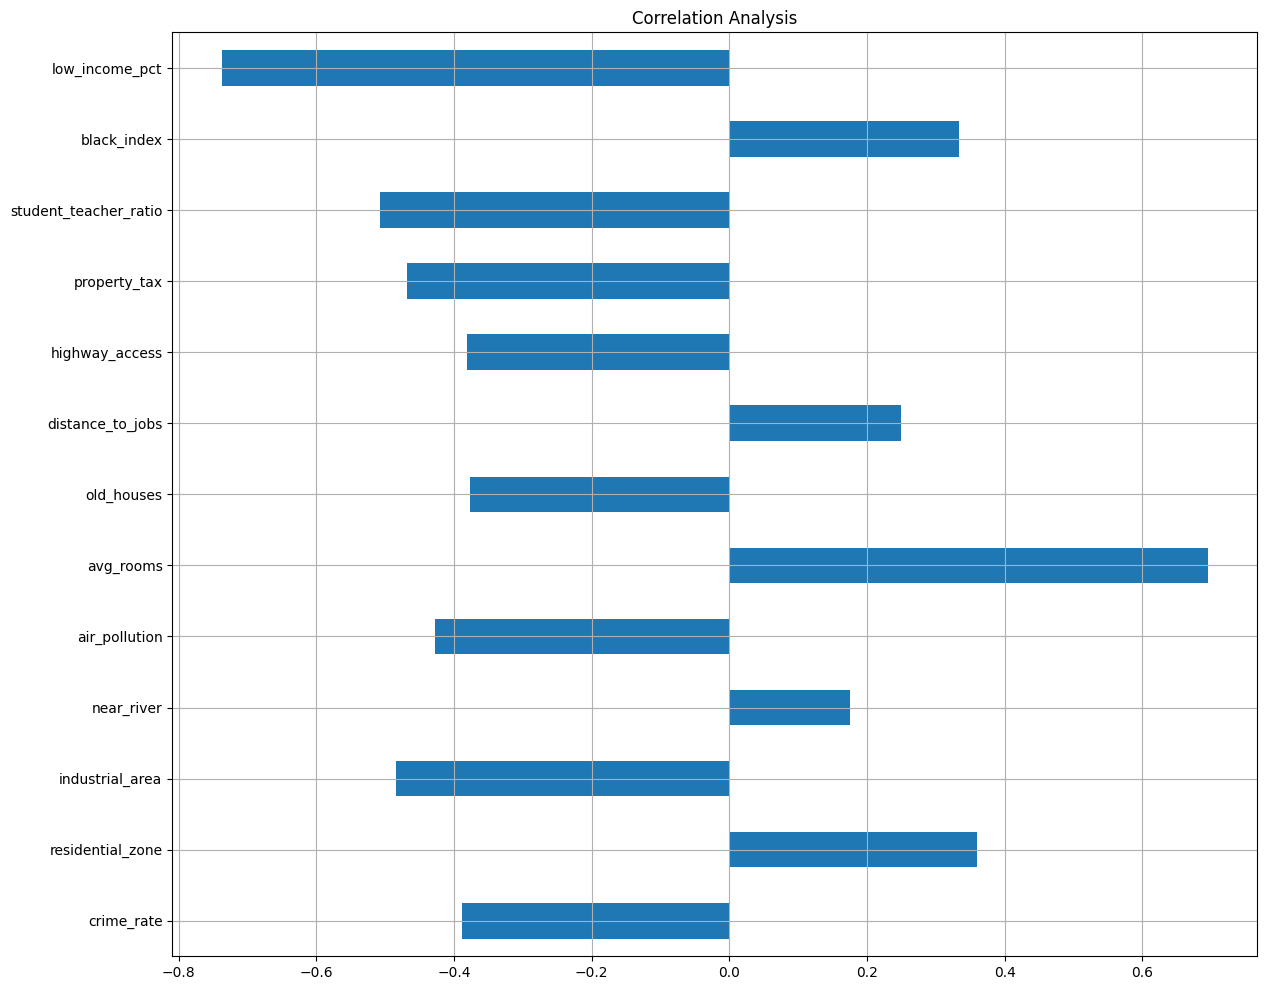

In [86]:
plt.figure(figsize=(14,12))
df_corr.plot(kind='barh', grid=True)
plt.title('Correlation Analysis')
plt.show()

In [87]:
df_corr = df_num.columns
df_corr

Index(['crime_rate', 'residential_zone', 'industrial_area', 'near_river',
       'air_pollution', 'avg_rooms', 'old_houses', 'distance_to_jobs',
       'highway_access', 'property_tax', 'student_teacher_ratio',
       'black_index', 'low_income_pct', 'house_price'],
      dtype='object')

In [88]:
df_corr = df[['crime_rate', 'residential_zone', 'industrial_area', 'near_river',
       'air_pollution', 'avg_rooms', 'old_houses', 'distance_to_jobs',
       'highway_access', 'property_tax', 'student_teacher_ratio',
       'black_index', 'low_income_pct', 'house_price']]

df_corr = df_corr.corr()

Feature Correlation Heatmap

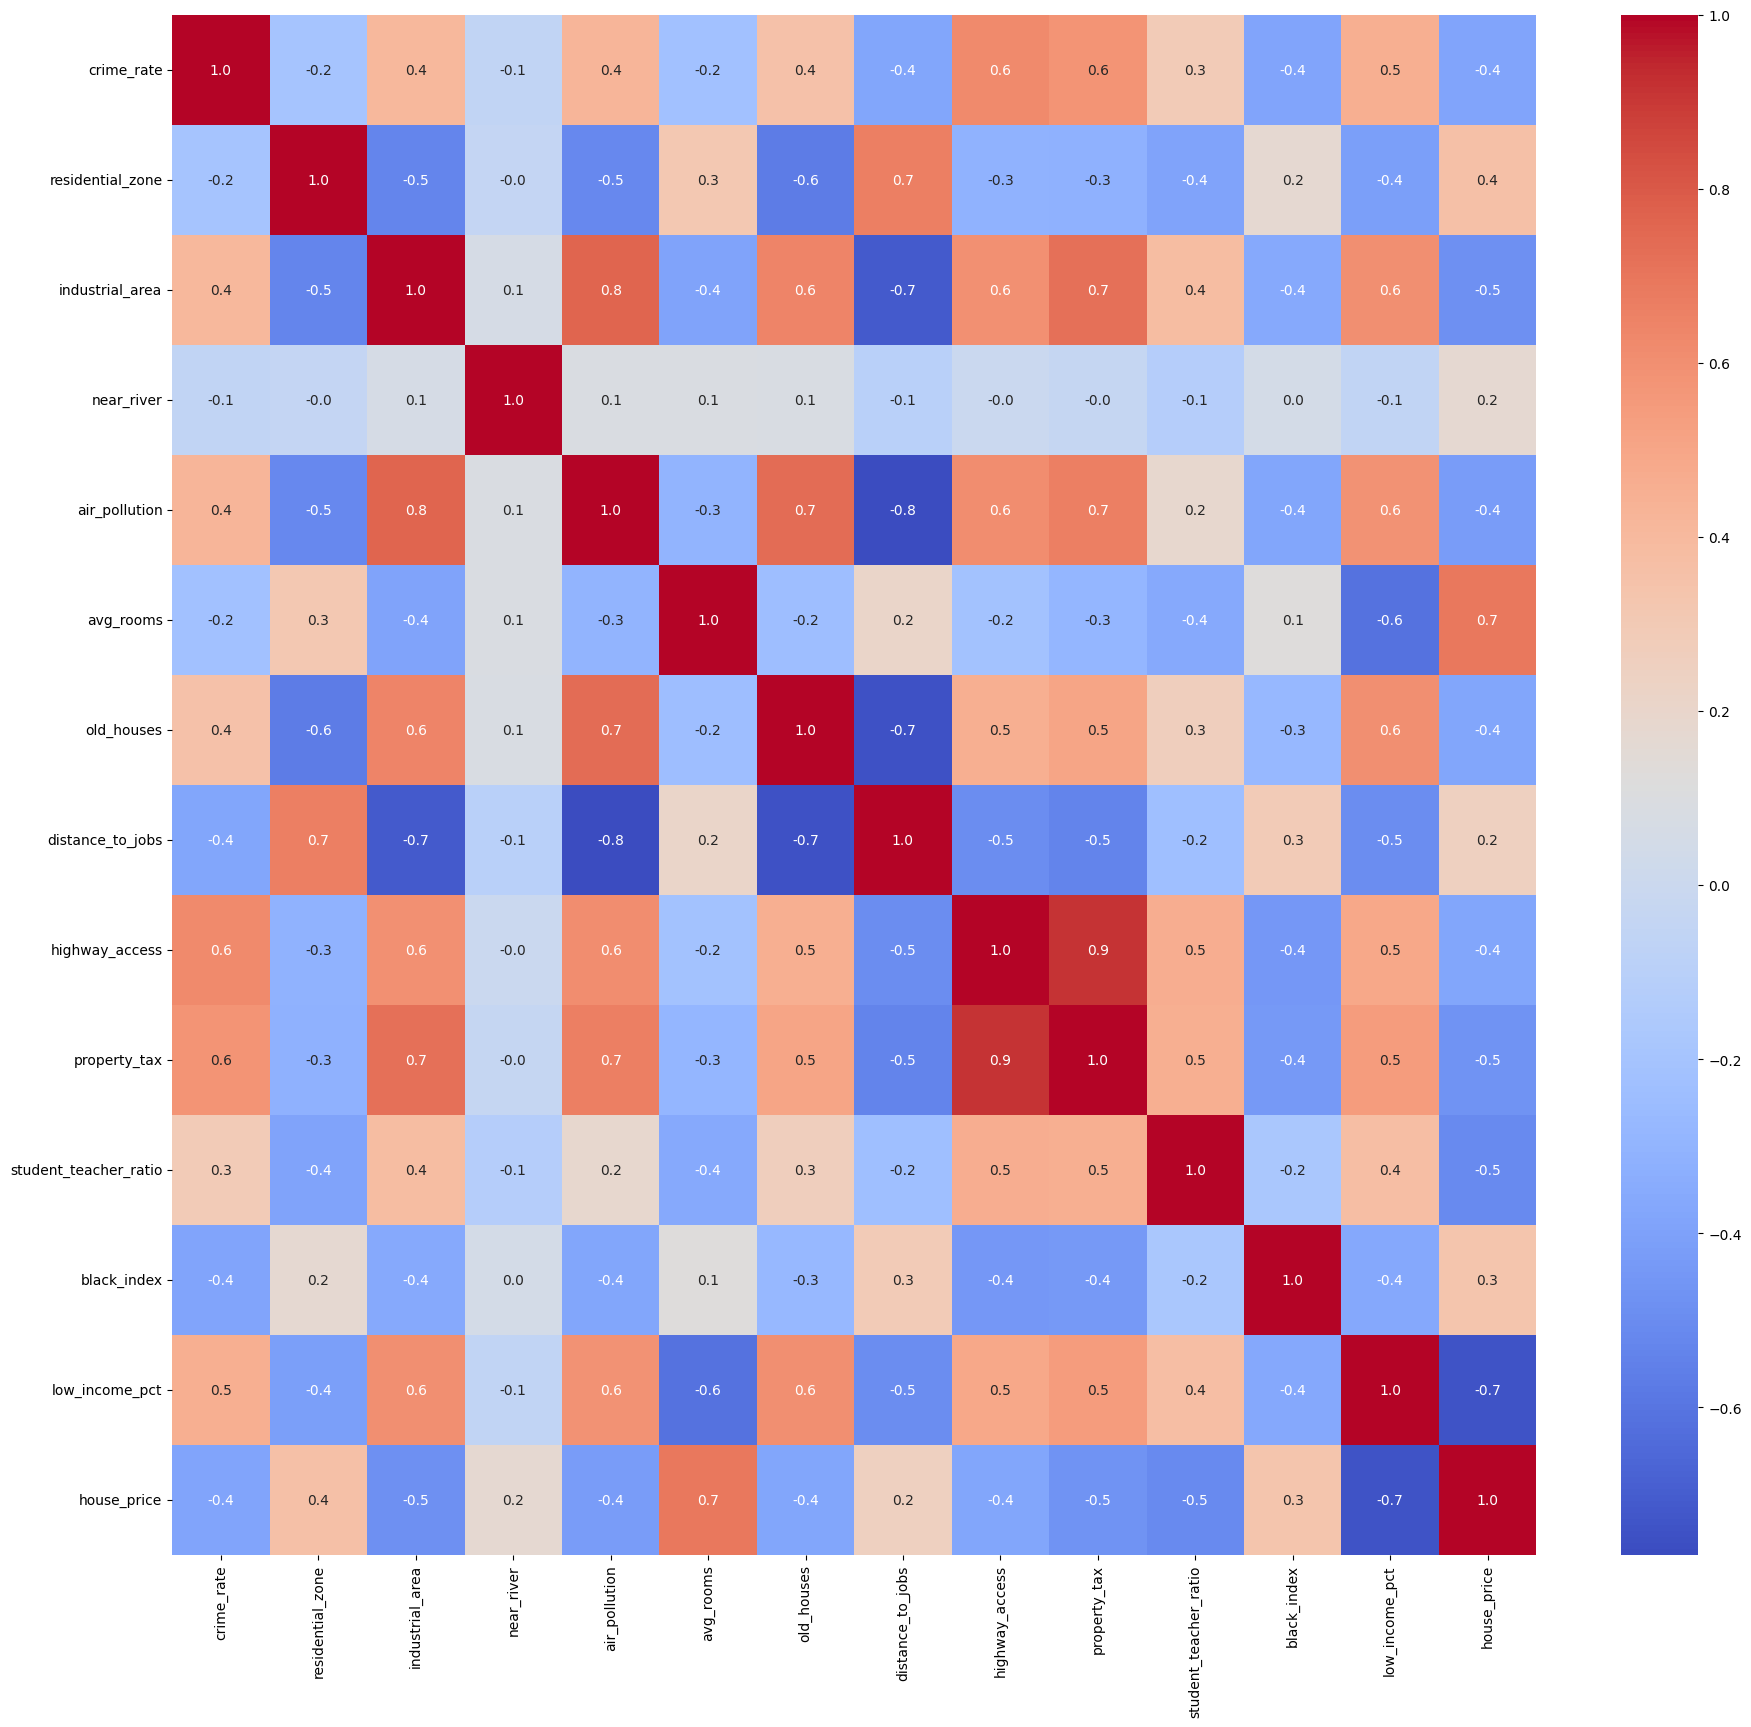

In [89]:
plt.figure(figsize=(22,20))
sns.heatmap(data=df_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

Data Splitting

In [90]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [91]:
train.to_csv('house prediction train set.csv', index=False)
test.to_csv('house prediction test set.csv', index=False)